In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

1*  Imaginability TangibilityCondition
2  AmountDonated Sympathy
3  Impact

forbiddirect
TangibilityCondition Impact

requiredirect
Sympathy TangibilityCondition

#### Load causal algorithms from the py-causal library and Run Bootstrapping RFCI

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'rfci', testId = 'sem-bic')

penaltyDiscount: Penalty discount (min = 0.0) (java.lang.Double) [default:2.0]
depth: Maximum size of conditioning set (unlimited = -1) (java.lang.Integer) [default:-1]
maxPathLength: The maximum length for any discriminating path. -1 if unlimited (min = -1) (java.lang.Integer) [default:-1]
completeRuleSetUsed: Yes if the complete FCI rule set should be used (java.lang.Boolean) [default:false]
numberResampling: The number of bootstraps/resampling iterations (min = 0) (java.lang.Integer) [default:0]
percentResampleSize: The percentage of resample size (min = 0.1) (java.lang.Integer) [default:100]
resamplingWithReplacement: Yes, if sampling with replacement (bootstrapping) (java.lang.Boolean) [default:true]
resamplingEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]
addOriginalDataset: Yes, if adding an original dataset as another bootstrapping (java.lang.Boolean) [default:false]
verbose: Yes if verbose output should be printed or logged 

In [6]:
tetrad.run(algoId = 'rfci', dfs = df, testId = 'sem-bic', priorKnowledge = prior, 
           penaltyDiscount = 2, depth = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
           numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

#### Bootstrapping RFCI Continuous' Result's Nodes

In [7]:
tetrad.getNodes()

['AmountDonated',
 'Imaginability',
 'Impact',
 'Sympathy',
 'TangibilityCondition']

#### Bootstrapping RFCI Continuous' Result's Edges

In [8]:
tetrad.getEdges()

['AmountDonated o-o Sympathy [AmountDonated o-o Sympathy]:0.5000;[no edge]:0.5000;',
 'Sympathy o-> Impact [Impact <-- Sympathy dd nl]:0.3333;[Impact <-o Sympathy]:0.5000;[no edge]:0.1667;',
 'Sympathy --> TangibilityCondition [Sympathy --> TangibilityCondition dd pl]:0.6667;[Sympathy --> TangibilityCondition dd nl]:0.3333; dd pl']

#### Plot The Result's Graph

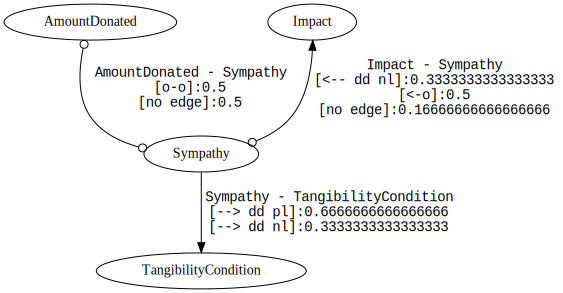

In [9]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [10]:
pc.stop_vm()